# # Yanny or Laurel 

Using scipy and librosa to hear what we want
Yanny or Laurel is the new audio clip taking the internet by storm. It is the new Gold vs Blue.

If you have been living under a rock, try listening [to the audio file](#)
You either hear **laurel** or you hear **yanny**, and once you have heard the one, hearing the other is almost impossible.

Here we will use librosa to see whats happening, and some light DSP with scipy to hear what we want. 

In [1]:
# Setup imports
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [2]:
# Read the audio file. sr is the default sampling rate of 22050
y, sr = librosa.load("/Users/shabda/Downloads/yanny-laurel.mp4")

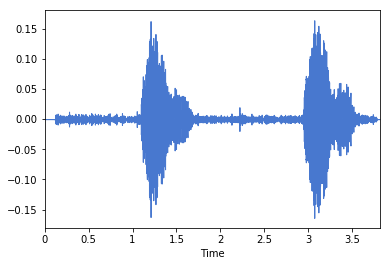

In [3]:
# Show the audio file.
librosa.display.waveplot(y, sr=sr)

This showed the amplitude envelope of the audio. The two peaks correspond to the two time yanny/laurel is spoken.

It doesn't tell us anything interesting, so maybe the spectrogram will be more interesting


In [4]:
# Librosa come with some utilities to show as mel_spectogram.
# Plotting the frequencies of sound as it varies with time.
# The color corresponds to the amplitude of the sound
# We define a simple function which takes the signal and draws the spectrogram
def display_mel_spectogram(y, sr):
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

    # Convert to log scale (dB)
    log_S = librosa.power_to_db(S, ref=np.max)

    # Make a new figure
    plt.figure(figsize=(12,4))

    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

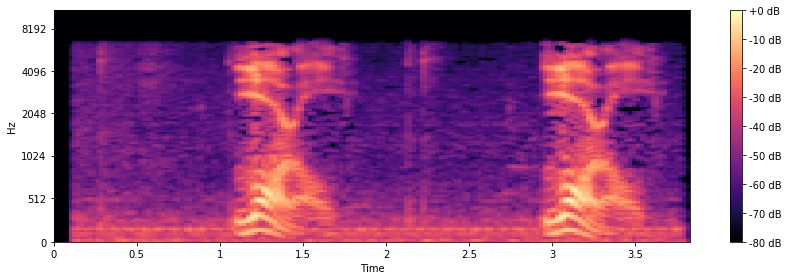

In [5]:
# And lets use the function on our audio
display_mel_spectogram(y, sr)

Now this is pretty interesting.

There are two mostly independent peaks of amplitude in frequency. 
There is one set of amplitudes which is above 1024 Hz, and another below 1024 hz
If we separate the two signals using a band pass flter, we can try listening to them seperatelty


In [6]:
# Define a function which wil apply a butterworth bandpass filter
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [7]:
# Now use butter_bandpass_filter to split the signal about the 1024 hz mark
signal_upper = butter_bandpass_filter(y, 1024, 7000, sr)
signal_lower = butter_bandpass_filter(y, 50, 1024, sr)

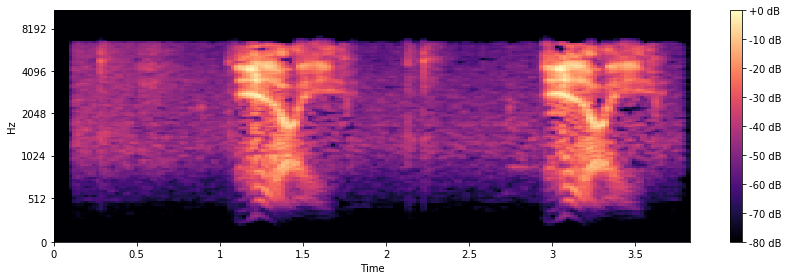

In [8]:
display_mel_spectogram(signal_upper, sr)

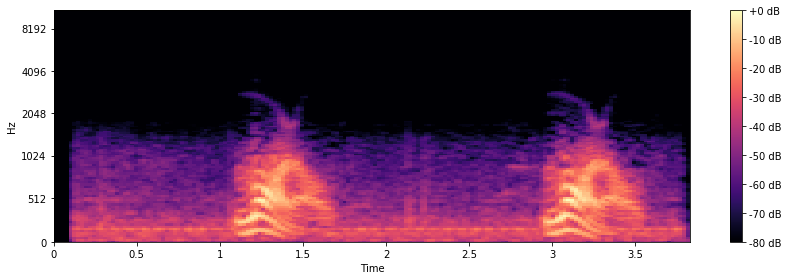

In [9]:
display_mel_spectogram(signal_lower, sr)

This looks promising. Lets listen to the audios.


In [10]:
IPython.display.Audio(signal_upper, rate=sr)

This sounds very much like **yanny** to me.

In [11]:
IPython.display.Audio(signal_lower, rate=sr)

And this sounds like **laurel**